<a href="https://colab.research.google.com/github/daisukelab/sound-clf-pytorch/blob/master/advanced/Multi-Label-FSDKaggle2019-on-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Multi label sound classification with FSDKaggle2019 dataset.

## Downloading FSDKaggle2019

    wget https://zenodo.org/record/3612637/files/FSDKaggle2019.doc.zip
    wget https://zenodo.org/record/3612637/files/FSDKaggle2019.meta.zip
    wget https://zenodo.org/record/3612637/files/FSDKaggle2019.audio_train_curated.zip
    wget https://zenodo.org/record/3612637/files/FSDKaggle2019.audio_train_noisy.z01
    wget https://zenodo.org/record/3612637/files/FSDKaggle2019.audio_train_noisy.z02
    wget https://zenodo.org/record/3612637/files/FSDKaggle2019.audio_train_noisy.z03
    wget https://zenodo.org/record/3612637/files/FSDKaggle2019.audio_train_noisy.z04
    wget https://zenodo.org/record/3612637/files/FSDKaggle2019.audio_train_noisy.z05
    wget https://zenodo.org/record/3612637/files/FSDKaggle2019.audio_train_noisy.z06
    wget https://zenodo.org/record/3612637/files/FSDKaggle2019.audio_train_noisy.zip
    wget https://zenodo.org/record/3612637/files/FSDKaggle2019.audio_test.zip
    


In [1]:
! wget https://zenodo.org/record/3612637/files/FSDKaggle2019.doc.zip
! wget https://zenodo.org/record/3612637/files/FSDKaggle2019.meta.zip
! wget https://zenodo.org/record/3612637/files/FSDKaggle2019.audio_train_curated.zip
# ! wget https://zenodo.org/record/3612637/files/FSDKaggle2019.audio_train_noisy.z01
# ! wget https://zenodo.org/record/3612637/files/FSDKaggle2019.audio_train_noisy.z02
# ! wget https://zenodo.org/record/3612637/files/FSDKaggle2019.audio_train_noisy.z03
# ! wget https://zenodo.org/record/3612637/files/FSDKaggle2019.audio_train_noisy.z04
# ! wget https://zenodo.org/record/3612637/files/FSDKaggle2019.audio_train_noisy.z05
# ! wget https://zenodo.org/record/3612637/files/FSDKaggle2019.audio_train_noisy.z06
# ! wget https://zenodo.org/record/3612637/files/FSDKaggle2019.audio_train_noisy.zip
! wget https://zenodo.org/record/3612637/files/FSDKaggle2019.audio_test.zip


--2021-01-31 23:30:59--  https://zenodo.org/record/3612637/files/FSDKaggle2019.doc.zip
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7584 (7.4K) [application/octet-stream]
Saving to: ‘FSDKaggle2019.doc.zip’

FSDKaggle2019.doc.z 100%[===================>]   7.41K  --.-KB/s    in 0s      

2021-01-31 23:31:01 (785 MB/s) - ‘FSDKaggle2019.doc.zip’ saved [7584/7584]

--2021-01-31 23:31:01--  https://zenodo.org/record/3612637/files/FSDKaggle2019.meta.zip
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 541274 (529K) [application/octet-stream]
Saving to: ‘FSDKaggle2019.meta.zip’

FSDKaggle2019.meta. 100%[===================>] 528.59K   696KB/s    in 0.8s    

2021-01-31 23:31:03 (696 KB/s) - ‘FSDKaggle2019.meta.zip’ saved [541274/541274]


In [2]:
zips = ! ls -1 *.zip
zips

['FSDKaggle2019.audio_test.zip',
 'FSDKaggle2019.audio_train_curated.zip',
 'FSDKaggle2019.doc.zip',
 'FSDKaggle2019.meta.zip']

In [3]:
! mkdir work
for f in zips:
    ! cd work && unzip -qq ../$f
#! mv FSD* work
! ls work

FSDKaggle2019.audio_test	   FSDKaggle2019.doc
FSDKaggle2019.audio_train_curated  FSDKaggle2019.meta


In [4]:
! pip install dl-cliche torch torchaudio pytorch-lightning scikit-multilearn

     |████████████████████████████████| 51kB 4.2MB/s 
     |████████████████████████████████| 7.6MB 9.9MB/s 
     |████████████████████████████████| 696kB 44.3MB/s 
     |████████████████████████████████| 92kB 14.4MB/s 
     |████████████████████████████████| 102kB 14.6MB/s 
     |████████████████████████████████| 1.3MB 55.8MB/s 
     |████████████████████████████████| 143kB 53.0MB/s 
     |████████████████████████████████| 296kB 54.9MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=972af70e84827a582851314b6272404da5b3c99cddf39bbbb0eeae329e201438
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl
ERROR: torchaudio 0.7.2 has requirement torch==1.7.1, but you'll have torch 1.7.0+cu101 which is incompatible.
ERROR: pytorch-lightning 1.1.6 has requirement future>=0.17.1, but you'll have future 0.16.0 which is incompatible.
ERROR: pytorch-lightning 1.1.6 has requi

In [5]:
! git clone https://github.com/daisukelab/sound-clf-pytorch.git
! mv work/* sound-clf-pytorch/work

Cloning into 'sound-clf-pytorch'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 46 (delta 22), reused 25 (delta 10), pack-reused 0
Unpacking objects: 100% (46/46), done.


In [6]:
%cd /content/sound-clf-pytorch
! ls

/content/sound-clf-pytorch
config.yaml		  README.md		  Training-Classifier.ipynb
Data-Preprocessing.ipynb  requirements.txt	  work
models.py		  Run-All-on-Colab.ipynb


# Preprocessing waveform audio into log-mel spectrogram

In [7]:
# This will make your notebook work easier (enables auto-reload, and etc ...)
from dlcliche.notebook import *
import warnings
warnings.simplefilter('ignore')

In [8]:
# Essential PyTorch
import torch
import torchaudio

# Other modules used in this notebook
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
import yaml
from easydict import EasyDict

from skmultilearn.model_selection import IterativeStratification
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.utils.class_weight import compute_class_weight

### 1-1. Example: Parameter handling with yaml

In [47]:
### CONFIGURE YOURS ###
ROOT = Path('work')
WORK = Path('work')

# Load configuration parameters
with open('config.yaml') as conf:
    cfg = EasyDict(yaml.safe_load(conf))

cfg.clip_length = 2.0
cfg.n_fft = 2048
cfg.n_mels = 128
cfg.unit_length = int((cfg.clip_length * cfg.sample_rate + cfg.hop_length - 1) // cfg.hop_length)

print(cfg)
print()
print('You can overwrite parameters here, example:')
print('cfg.n_mels = 128')

{'clip_length': 2.0, 'sample_rate': 44100, 'hop_length': 441, 'n_fft': 2048, 'n_mels': 128, 'f_min': 0, 'f_max': 22050, 'unit_length': 200}

You can overwrite parameters here, example:
cfg.n_mels = 128


### 1-2. Example: Load & convert to spectrogram

In [48]:
#! mv ../work/* work
# ! ls work
sorted(ROOT.glob('*'))[:5]


[PosixPath('work/.placeholder'),
 PosixPath('work/FSDKaggle2019.audio_test'),
 PosixPath('work/FSDKaggle2019.audio_train_curated'),
 PosixPath('work/FSDKaggle2019.doc'),
 PosixPath('work/FSDKaggle2019.meta')]

Training set has 4970 files. First file: work/FSDKaggle2019.audio_train_curated/0006ae4e.wav


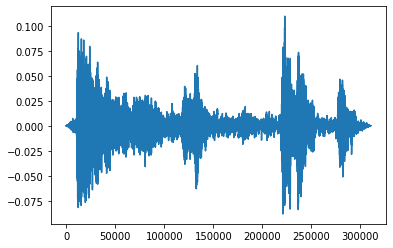

Listen to the first 1 second.


In [49]:
# Load example wave.
train_files = sorted(ROOT.glob('FSDKaggle2019.audio_train_curated/*.wav'))

print(f'Training set has {len(train_files)} files. First file:', train_files[0])
waveform, sr = torchaudio.load(train_files[0])
plt.plot(waveform.t().numpy()); plt.show()
print('Listen to the first 1 second.')
Audio(waveform[0, :sr], rate=sr)

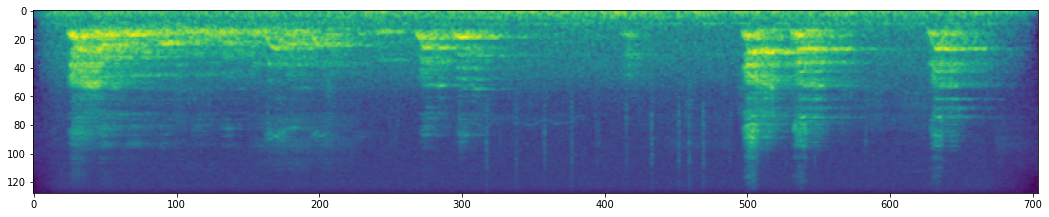

In [50]:
# Instantiate mel spectrogram converter 
to_mel_spectrogram = torchaudio.transforms.MelSpectrogram(
    sample_rate=cfg.sample_rate, n_fft=cfg.n_fft, n_mels=cfg.n_mels,
    hop_length=cfg.hop_length, f_min=cfg.f_min, f_max=cfg.f_max)

# Waveform to log-mel spectrogram
log_mel_spec = to_mel_spectrogram(waveform).log()

plt.figure(figsize=(18,5))
plt.imshow(log_mel_spec[0])

## Preprocess audio files: convert to log-mel spectrogram

In [51]:
folders = ['FSDKaggle2019.audio_test', 'FSDKaggle2019.audio_train_curated']

for folder in folders:
    cur_folder = ROOT/folder
    filenames = sorted(cur_folder.glob('*.wav'))
    for filename in filenames:
        # Load waveform
        waveform, sr = torchaudio.load(filename)
        assert sr == cfg.sample_rate
        # To log-mel spectrogram
        log_mel_spec = (to_mel_spectrogram(waveform) + np.finfo(np.float).eps).log()
        # Write to work
        (WORK/folder).mkdir(parents=True, exist_ok=True)
        np.save(WORK/folder/filename.name.replace('.wav', '.npy'), log_mel_spec)

In [52]:
# Shows number of files converted
!ls -1R {WORK} | grep .npy | wc -l

9451


# Training Models

In [53]:
# Essential PyTorch
import torch
import torchaudio

# Other modules used in this notebook
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Audio
import yaml
from easydict import EasyDict
from sklearn.model_selection import train_test_split
import multiprocessing


device = torch.device('cuda')

print(cfg)

{'clip_length': 2.0, 'sample_rate': 44100, 'hop_length': 441, 'n_fft': 2048, 'n_mels': 128, 'f_min': 0, 'f_max': 22050, 'unit_length': 200}


In [54]:
# https://github.com/DCASE-REPO/dcase2019_task2_baseline/blob/master/evaluation.py


class Lwlrap(object):
  """Computes label-weighted label-ranked average precision (lwlrap)."""

  def __init__(self, class_map):
    self.num_classes = 0
    self.total_num_samples = 0
    self._class_map = class_map

  def accumulate(self, batch_truth, batch_scores):
    """Accumulate a new batch of samples into the metric.
    Args:
      truth: np.array of (num_samples, num_classes) giving boolean
        ground-truth of presence of that class in that sample for this batch.
      scores: np.array of (num_samples, num_classes) giving the 
        classifier-under-test's real-valued score for each class for each
        sample.
    """
    assert batch_scores.shape == batch_truth.shape
    num_samples, num_classes = batch_truth.shape
    if not self.num_classes:
      self.num_classes = num_classes
      self._per_class_cumulative_precision = np.zeros(self.num_classes)
      self._per_class_cumulative_count = np.zeros(self.num_classes, 
                                                  dtype=np.int)
    assert num_classes == self.num_classes
    for truth, scores in zip(batch_truth, batch_scores):
      pos_class_indices, precision_at_hits = (
        self._one_sample_positive_class_precisions(scores, truth))
      self._per_class_cumulative_precision[pos_class_indices] += (
        precision_at_hits)
      self._per_class_cumulative_count[pos_class_indices] += 1
    self.total_num_samples += num_samples

  def _one_sample_positive_class_precisions(self, scores, truth):
    """Calculate precisions for each true class for a single sample.
    Args:
      scores: np.array of (num_classes,) giving the individual classifier scores.
      truth: np.array of (num_classes,) bools indicating which classes are true.
    Returns:
      pos_class_indices: np.array of indices of the true classes for this sample.
      pos_class_precisions: np.array of precisions corresponding to each of those
        classes.
    """
    num_classes = scores.shape[0]
    pos_class_indices = np.flatnonzero(truth > 0)
    # Only calculate precisions if there are some true classes.
    if not len(pos_class_indices):
      return pos_class_indices, np.zeros(0)
    # Retrieval list of classes for this sample.
    retrieved_classes = np.argsort(scores)[::-1]
    # class_rankings[top_scoring_class_index] == 0 etc.
    class_rankings = np.zeros(num_classes, dtype=np.int)
    class_rankings[retrieved_classes] = range(num_classes)
    # Which of these is a true label?
    retrieved_class_true = np.zeros(num_classes, dtype=np.bool)
    retrieved_class_true[class_rankings[pos_class_indices]] = True
    # Num hits for every truncated retrieval list.
    retrieved_cumulative_hits = np.cumsum(retrieved_class_true)
    # Precision of retrieval list truncated at each hit, in order of pos_labels.
    precision_at_hits = (
        retrieved_cumulative_hits[class_rankings[pos_class_indices]] /
        (1 + class_rankings[pos_class_indices].astype(np.float)))
    return pos_class_indices, precision_at_hits

  def per_class_lwlrap(self):
    """Return a vector of the per-class lwlraps for the accumulated samples."""
    return (self._per_class_cumulative_precision /
            np.maximum(1, self._per_class_cumulative_count))

  def per_class_weight(self):
    """Return a normalized weight vector for the contributions of each class."""
    return (self._per_class_cumulative_count /
            float(np.sum(self._per_class_cumulative_count)))

  def overall_lwlrap(self):
    """Return the scalar overall lwlrap for cumulated samples."""
    return np.sum(self.per_class_lwlrap() * self.per_class_weight())

  def __str__(self):
    per_class_lwlrap = self.per_class_lwlrap()
    # List classes in descending order of lwlrap.
    s = (['Lwlrap(%s) = %.6f' % (name, lwlrap) for (lwlrap, name) in
             sorted([(per_class_lwlrap[i], self._class_map[i]) for i in range(self.num_classes)],
                    reverse=True)])
    s.append('Overall lwlrap = %.6f' % (self.overall_lwlrap()))
    return '\n'.join(s)


### Load FSDKaggle2019 meta data to variables

In [55]:
# Make lists of filenames and labels from meta files
dfs = {}
for split, npy_folder, meta_filename in [['train', 'work/FSDKaggle2019.audio_train_curated', 'train_curated_post_competition.csv'],
                                         ['test', 'work/FSDKaggle2019.audio_test', 'test_post_competition.csv']]:
    df = pd.read_csv(ROOT/'FSDKaggle2019.meta'/meta_filename)
    df.fname = [(npy_folder + '/' + fname.replace('.wav', '.npy')) for fname in df.fname.values]
    dfs[split] = df
    #labels[split] = list(df.labels.values)

In [56]:
from dlcliche.utils import flatten_list


def get_multi_label(train_df):
    classes = sorted(set(flatten_list([ls.split(',') for ls in train_df.labels.values])))
    multi_labels = np.array([np.array(ls) for ls in train_df.labels.map(lambda x: [int(c in str(x).split(',')) for c in classes]).values])

    # create multi label dataframe
    df = pd.DataFrame(multi_labels, columns=classes)
    df.index = train_df.fname
    return df, classes


train_df, classes = get_multi_label(dfs['train'])
test_df, _ = get_multi_label(dfs['test'])

In [57]:
from sklearn.utils.class_weight import compute_class_weight


train_single_labels = [classes.index(l) for l in flatten_list([ls.split(',') for ls in dfs['train'].labels.values])]
class_weight = compute_class_weight('balanced', range(len(classes)), train_single_labels )
class_weight = torch.tensor(class_weight).to(torch.float)
print('class weight', class_weight)

class weight tensor([0.9587, 1.5298, 0.9587, 0.9587, 0.9587, 0.9587, 0.9587, 0.9587, 1.0731,
        0.9587, 0.9587, 1.2839, 0.9587, 0.9587, 0.9587, 0.9587, 0.9587, 0.9587,
        0.9587, 0.9587, 0.9587, 0.9587, 0.9587, 0.9587, 0.9587, 0.9587, 0.9587,
        0.9587, 0.9587, 0.9587, 0.9587, 0.9587, 0.9587, 1.4380, 0.9587, 1.1413,
        1.4979, 1.2839, 0.9587, 0.9587, 0.9587, 0.9587, 0.9587, 0.9587, 0.9587,
        0.9587, 0.9587, 0.9587, 1.4673, 0.9587, 0.9587, 0.9587, 0.9587, 1.1062,
        1.2839, 0.9587, 0.9587, 0.9587, 0.9587, 0.9587, 1.2614, 0.9587, 0.9587,
        0.9587, 1.1413, 0.9587, 0.9587, 0.9587, 0.9587, 0.9986, 0.9587, 0.9587,
        1.3566, 0.9587, 0.9587, 0.9587, 0.9587, 0.9587, 0.9587, 0.9587])


In [58]:
# tfm = AudioRandomResizedCrop((NF, NT), scale=(0.95, 1.0), ratio=(NF/(NT*1.05), NF/(NT*0.95)))


from dlcliche.torch_utils import IntraBatchMixupBCE
import pytorch_lightning as pl
import datetime
import logging
from models import resnetish18
import torch.nn as nn
import torch.nn.functional as F
from dlcliche.utils import copy_file


class MLClfLearner(pl.LightningModule):

    def __init__(self, model, dataloaders, learning_rate=3e-4, mixup_alpha=0.2, weight=None):
        super().__init__()
        self.learning_rate = learning_rate
        self.model = model
        self.train_loader, self.valid_loader, self.test_loader = dataloaders

        self.criterion = nn.BCEWithLogitsLoss(weight=weight)
        self.batch_mixer = IntraBatchMixupBCE(alpha=mixup_alpha)
        self.lwlrap = Lwlrap(classes)

    def forward(self, x):
        x = self.model(x)
        return x

    def step(self, x, y, train):
        mixed_inputs, mixed_labels = self.batch_mixer.transform(x, y, train=train)
        preds = self(mixed_inputs)
        #print(preds, mixed_labels.to(torch.float))
        loss = self.criterion(preds, mixed_labels.to(torch.float))
        return preds, loss

    def training_step(self, batch, batch_idx):
        x, y = batch
        preds, loss = self.step(x, y, train=True)
        return loss

    def on_validation_start(self, **kwargs):
        self.lwlrap = Lwlrap(classes)

    def validation_step(self, batch, batch_idx, split='val'):
        x, gt = batch
        preds, loss = self.step(x, gt, train=False)
        self.lwlrap.accumulate(gt.cpu().numpy(), F.sigmoid(preds).cpu().numpy())

        self.log(f'{split}_loss', loss, prog_bar=True)
        #batch_lwlrap = lwlrap(gt.cpu().numpy(), preds.cpu().numpy())
        #self.log(f'{split}_lwlrap', batch_lwlrap, prog_bar=True)
        if batch_idx >= len(self.valid_loader) - 1:
            self.log(f'val_lwlrap', self.lwlrap.overall_lwlrap(), prog_bar=False)
        logging.info(self.lwlrap)
        return loss

    def test_step(self, batch, batch_idx):
        return self.validation_step(batch, batch_idx, split='test')

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.learning_rate)
        return optimizer

    def train_dataloader(self):
        return self.train_loader

    def val_dataloader(self):
        return self.valid_loader

    def test_dataloader(self):
        return self.test_loader


def ml_fold_spliter(train_df, random_state=42):
    fnames = train_df.index.values

    # multi label stratified train-test splitter
    splitter = IterativeStratification(n_splits=5, random_state=random_state)

    for train, test in splitter.split(train_df.index, train_df):
        yield train_df.iloc[train], train_df.iloc[test]


def sample_length(log_mel_spec):
    return log_mel_spec.shape[-1]


class MLClfDataset(torch.utils.data.Dataset):
    def __init__(self, cfg, df, transforms=None, normalize=False):
        self.df = df
        self.transforms = transforms
        self.normalize = normalize

        # Calculate length of clip this dataset will make
        self.cfg = cfg
        self.unit_length = cfg.unit_length
        self.hop = cfg.hop_length / cfg.sample_rate

        # Show basic info.
        print(f'Dataset will yield log-mel spectrogram {len(self)} data samples in shape [1, {cfg.n_mels}, {self.unit_length}]')

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        assert 0 <= index and index < len(self)
        row = self.df.iloc[index]
        filename = f'{row.name}'

        log_mel_spec = np.load(filename)

        # normalize - instance based
        if self.normalize:
            _m, _s = log_mel_spec.mean(),  log_mel_spec.std() + np.finfo(np.float).eps
            log_mel_spec = (log_mel_spec - _m) / _s

        # Padding if sample is shorter than expected - both head & tail are filled with 0s
        pad_size = self.unit_length - sample_length(log_mel_spec)
        offset = 0
        if pad_size > 0:
            offset = np.random.randint(1, pad_size) if pad_size > 1 else 0 # (pad_size // 2) -- for making it center
            log_mel_spec = np.pad(log_mel_spec, ((0, 0), (0, 0), (offset, pad_size - offset)), 'constant')

        # Random crop
        crop_size = sample_length(log_mel_spec) - self.unit_length
        start = 0
        if crop_size > 0:
            start = np.random.randint(0, crop_size)
            log_mel_spec = log_mel_spec[..., start:start + self.unit_length]

        # Apply augmentations
        log_mel_spec = torch.Tensor(log_mel_spec)
        if self.transforms is not None:
            log_mel_spec = self.transforms(log_mel_spec)

        return log_mel_spec, row.values

In [59]:
class SplitAllDataset(torch.utils.data.Dataset):
    def __init__(self, cfg, df, normalize=False, top_n=99999):
        self.df = df
        self.normalize = normalize

        # Calculate length of clip this dataset will make
        self.L = cfg.unit_length

        # Get # of splits for all files
        self.n_splits = np.array([(np.load(f).shape[-1] + self.L - 1) // self.L for f in df.index.values])
        self.n_splits = np.clip(1, top_n, self.n_splits) # limit number of splits.
        self.sum_splits = np.cumsum(self.n_splits)

    def __len__(self):
        return self.sum_splits[-1]

    def file_index(self, index):
        return sum((index < self.sum_splits) == False)

    def filename(self, index):
        return self.df.index.values[self.file_index(index)]

    def split_index(self, index):
        fidx = self.file_index(index)
        prev_sum = self.sum_splits[fidx - 1] if fidx > 0 else 0
        return index - prev_sum

    def __getitem__(self, index):
        assert 0 <= index and index < len(self)

        log_mel_spec = np.load(self.filename(index))
        start = self.split_index(index) * self.L
        log_mel_spec = log_mel_spec[..., start:start + self.L]

        # normalize - instance based
        if self.normalize:
            _m, _s = log_mel_spec.mean(),  log_mel_spec.std() + np.finfo(np.float).eps
            log_mel_spec = (log_mel_spec - _m) / _s

        # Padding if sample is shorter than expected - both head & tail are filled with 0s
        pad_size = self.L - sample_length(log_mel_spec)
        if pad_size > 0:
            offset = pad_size // 2
            log_mel_spec = np.pad(log_mel_spec, ((0, 0), (0, 0), (offset, pad_size - offset)), 'constant')

        return log_mel_spec, self.file_index(index)

#ds = SplitAllDataset(cfg, filenames['train'][:10], norm_mean_std=train_mean_std)
#ds[25][0].sum()

def eval_all_splits(cfg, model, device, classes, df, normalize=False, debug_name=None, n=1, bs=64, top_n=99999):
    model = model.to(device).eval()
    file_probas = [[] for _ in range(len(df))]
    test_dataset = SplitAllDataset(cfg, df, normalize=normalize, top_n=top_n)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=bs, pin_memory=True, num_workers=multiprocessing.cpu_count())
    print(f'Predicting all {len(test_dataset)} splits for {len(df)} files...')
    for _ in range(n):
        for X, fileidxs in test_loader:
            with torch.no_grad():
                preds = model(X.to(device))
                probas = F.sigmoid(preds)
            for idx, prob in zip(fileidxs.cpu().numpy(), probas.cpu().numpy()):
                file_probas[idx].append(prob)
    file_probas = np.array([np.mean(probas, axis=0) for probas in file_probas])
    lwlrap = Lwlrap(classes)
    lwlrap.accumulate(df.values, file_probas)
    return file_probas, lwlrap.overall_lwlrap(), lwlrap.per_class_lwlrap()


#### Wait, check what GPU is running?

In [60]:
! pip install gputil humanize
! nvidia-smi --query-gpu=gpu_name,driver_version,memory.total --format=csv


import os
import humanize
import psutil
import GPUtil as GPU
GPUs = GPU.getGPUs()
gpu = GPUs[0]


def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))

printm()

name, driver_version, memory.total [MiB]
Tesla T4, 418.67, 15079 MiB
Gen RAM Free: 8.7 GB  | Proc size: 4.5 GB
GPU RAM Free: 12674MB | Used: 2405MB | Util  16% | Total 15079MB


## n_fft = 2048

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Dataset will yield log-mel spectrogram 3973 data samples in shape [1, 128, 200]
Dataset will yield log-mel spectrogram 997 data samples in shape [1, 128, 200]



  | Name      | Type              | Params
------------------------------------------------
0 | model     | ResNetish         | 11.2 M
1 | criterion | BCEWithLogitsLoss | 0     
------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params



Predicting all 25533 splits for 4481 files...
Saved fold#0 weight as work/weights-2102010449/T-f0-ResNetish-epoch=99-val_lwlrap=0.662.ckpt
Test lwlrap =0.569063852931849


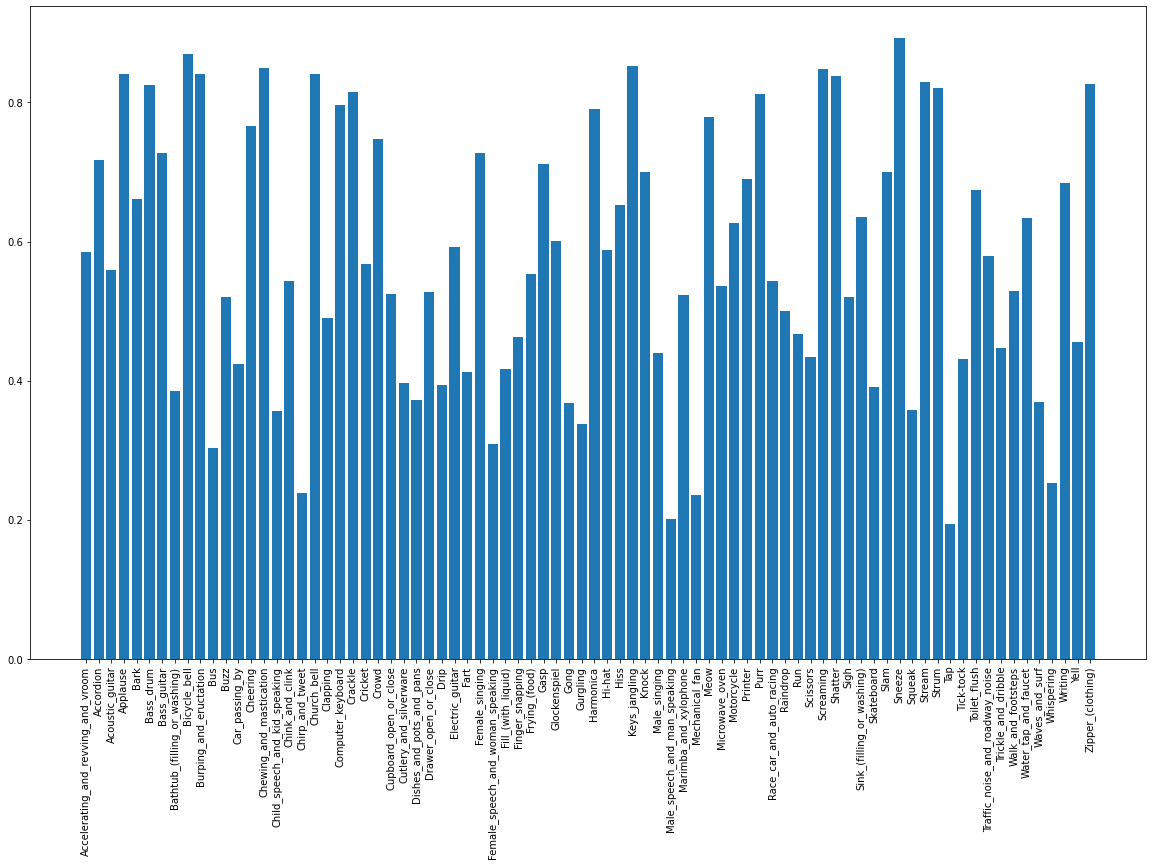

GPU available: True, used: True
TPU available: None, using: 0 TPU cores


Dataset will yield log-mel spectrogram 3972 data samples in shape [1, 128, 200]
Dataset will yield log-mel spectrogram 998 data samples in shape [1, 128, 200]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params
------------------------------------------------
0 | model     | ResNetish         | 11.2 M
1 | criterion | BCEWithLogitsLoss | 0     
------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params



Predicting all 25533 splits for 4481 files...
Saved fold#1 weight as work/weights-2102010449/T-f1-ResNetish-epoch=99-val_lwlrap=0.646.ckpt
Test lwlrap =0.5631820845359663


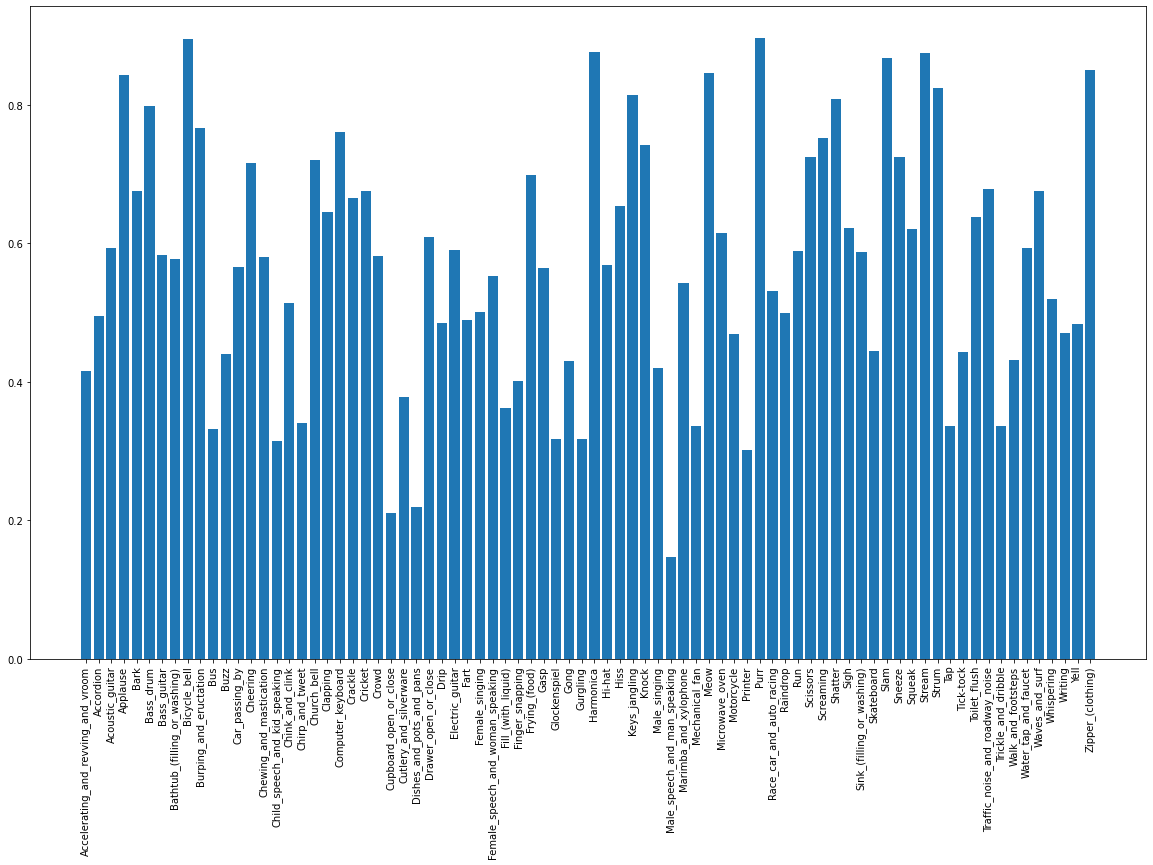

Dataset will yield log-mel spectrogram 3978 data samples in shape [1, 128, 200]
Dataset will yield log-mel spectrogram 992 data samples in shape [1, 128, 200]


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params
------------------------------------------------
0 | model     | ResNetish         | 11.2 M
1 | criterion | BCEWithLogitsLoss | 0     
------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params



Predicting all 25533 splits for 4481 files...
Saved fold#2 weight as work/weights-2102010449/T-f2-ResNetish-epoch=99-val_lwlrap=0.667.ckpt
Test lwlrap =0.5503849020948697


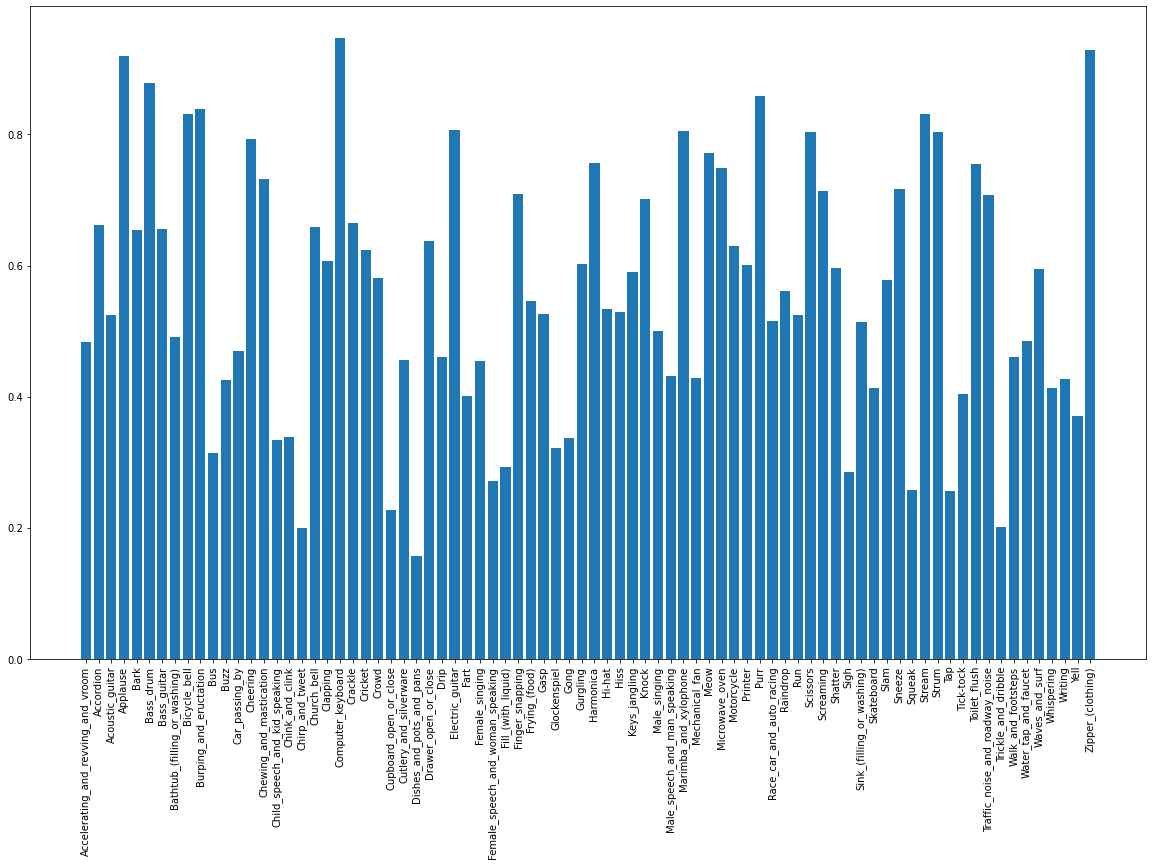

Dataset will yield log-mel spectrogram 3971 data samples in shape [1, 128, 200]
Dataset will yield log-mel spectrogram 999 data samples in shape [1, 128, 200]


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params
------------------------------------------------
0 | model     | ResNetish         | 11.2 M
1 | criterion | BCEWithLogitsLoss | 0     
------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params



Predicting all 25533 splits for 4481 files...
Saved fold#3 weight as work/weights-2102010449/T-f3-ResNetish-epoch=99-val_lwlrap=0.653.ckpt
Test lwlrap =0.5870914808408623


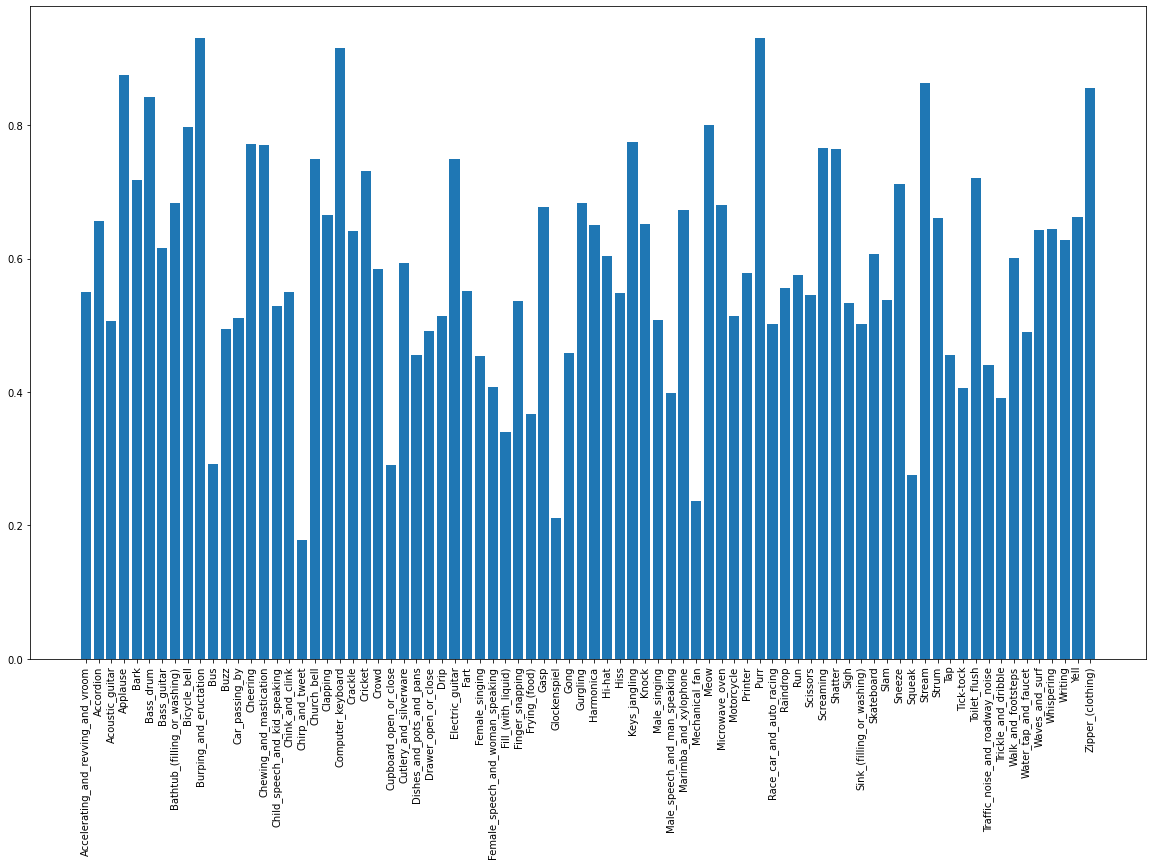

Dataset will yield log-mel spectrogram 3986 data samples in shape [1, 128, 200]
Dataset will yield log-mel spectrogram 984 data samples in shape [1, 128, 200]


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params
------------------------------------------------
0 | model     | ResNetish         | 11.2 M
1 | criterion | BCEWithLogitsLoss | 0     
------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params


In [ ]:
BS = 128
TYPE = 'T'
EPOCHS = 100
EVAL_DIV = (65 + cfg.clip_length) // cfg.clip_length


NF, NT = cfg.n_mels, cfg.unit_length
tfms = None
weight_folder = datetime.datetime.now().strftime('work/weights-%y%m%d%H%M') 
weight_folder = Path(weight_folder)
weight_folder.mkdir(parents=True)

lwlraps, all_file_probas = [], []

for fold, (trn_df, val_df) in enumerate(ml_fold_spliter(train_df)):
    train_dataset = MLClfDataset(cfg, trn_df, transforms=tfms)
    valid_dataset = MLClfDataset(cfg, val_df)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BS, shuffle=True, num_workers=multiprocessing.cpu_count())
    valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=BS, pin_memory=True, num_workers=multiprocessing.cpu_count())

    model = resnetish18(len(classes))
    #load_weight(model, PRETRAINED, device)
    
    learner = MLClfLearner(model, [train_loader, valid_loader, None], mixup_alpha=0.5, weight=class_weight.to(torch.float))
    checkpoint = pl.callbacks.ModelCheckpoint(monitor='val_lwlrap', mode='max', #verbose=True,
                                              filename=TYPE+f'-f{fold}-'+str(learner.model).split('(')[0]+'-{epoch}-{val_lwlrap:.3f}')
    trainer = pl.Trainer(gpus=1, max_epochs=EPOCHS, callbacks=[checkpoint])
    trainer.fit(learner)

    learner.load_state_dict(torch.load(checkpoint.best_model_path)['state_dict'])

    file_probas, all_lwlrap, per_class_lwlrap = eval_all_splits(cfg, model, device, classes, test_df, bs=BS)
    foldweight = weight_folder/Path(checkpoint.best_model_path).name
    copy_file(checkpoint.best_model_path, foldweight)
    print(f'Saved fold#{fold} weight as {foldweight}')
    print(f'Test lwlrap ={all_lwlrap}')
    lwlraps.append(all_lwlrap)
    all_file_probas.append(file_probas)

    plt.figure(figsize=(20, 12))
    plt.xticks(rotation=90)
    plt.bar(classes, per_class_lwlrap)
    plt.show()

mean_lwlraps = np.array(lwlraps).mean()
renamed_folder = str(weight_folder) + f'-{mean_lwlraps:.3f}'
weight_folder.rename(renamed_folder)
print(f'Mean lwlrap was {mean_lwlraps} for {renamed_folder}')

mean_file_probas = np.array(all_file_probas).mean(axis=0)
lwlrap = Lwlrap(classes)
lwlrap.accumulate(test_df.values, mean_file_probas)
print('Ensemble results:', lwlrap.overall_lwlrap(), lwlrap.per_class_lwlrap())